In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import z_score

# Step 1: Load data

In [15]:
df = pd.read_csv('Data/house-data.csv')

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Step 2: Clean data

From the data, there can be seen an 'id' on each row. This is an arbitrary value for identifying a unique row and is not needed for further data analysis, so it'll be dropped.

In [17]:
df = df.drop(['id'], axis=1)

In [18]:
print("--- Check for missing values ---")
print(df.isnull().sum())

print("--- Check for NaN values ---")
print(df.isna().sum())

print("--- Check for data types ---")
print(df.info())

--- Check for missing values ---
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--- Check for NaN values ---
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--- Check for data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column   

The check for null values gave no results, but the type check showed that the 'date' field was marked as an object!

In [19]:
df["date"] = pd.to_datetime(df["date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

The 'date' field is now changed to a datetime instead.

# Step 3: Explore data

In [20]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Checking for outliers, first by checking for bellcurves by plotting each column as histogram plot

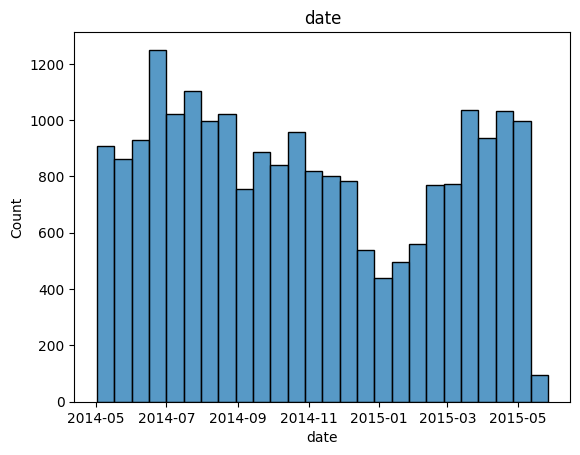

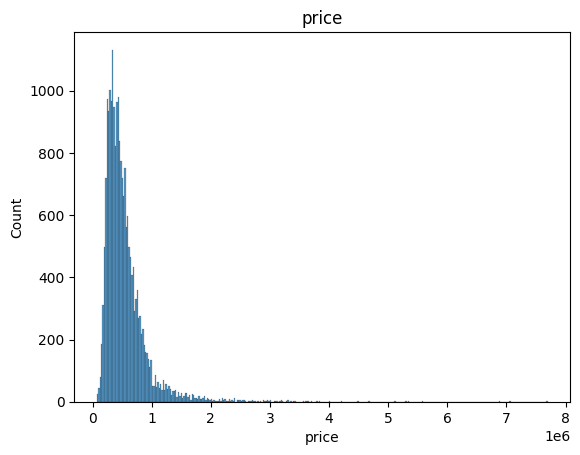

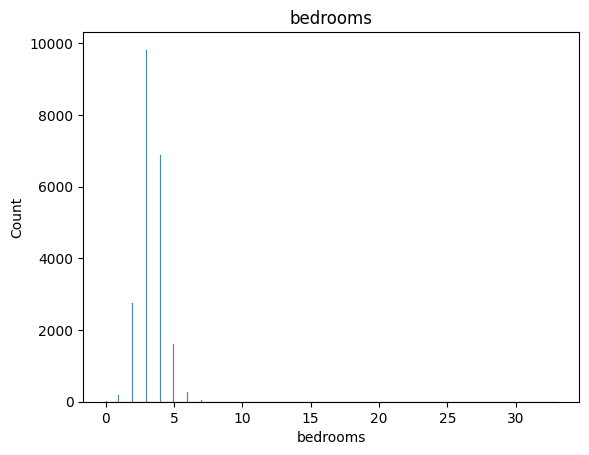

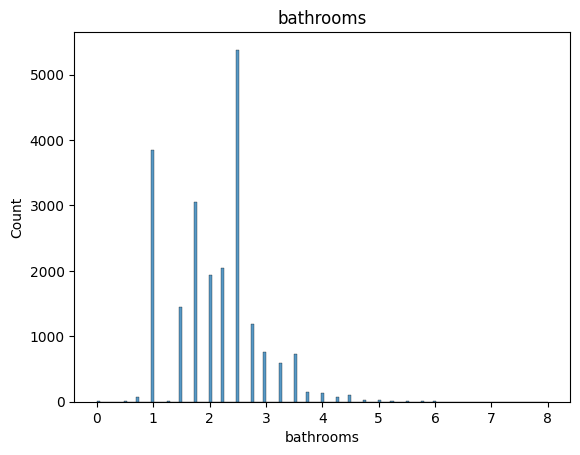

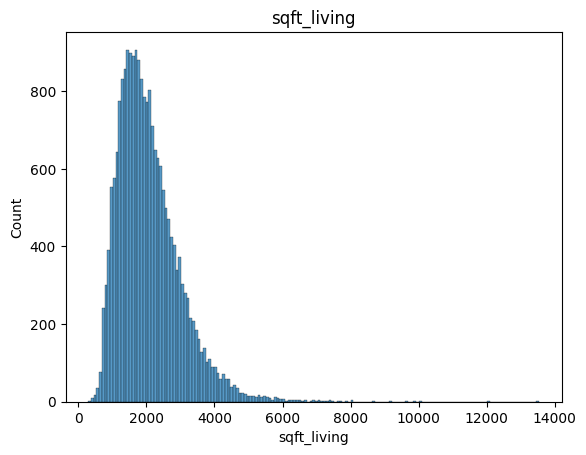

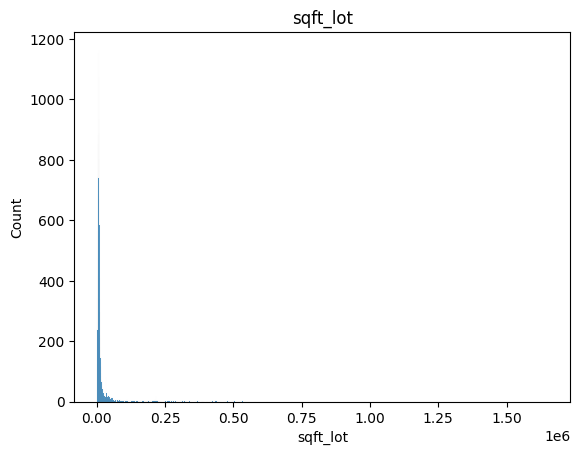

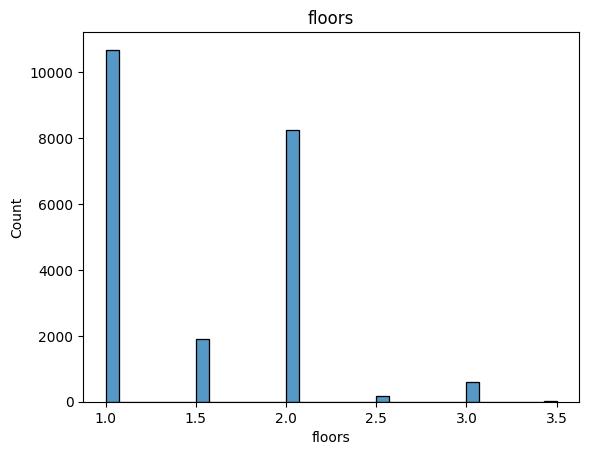

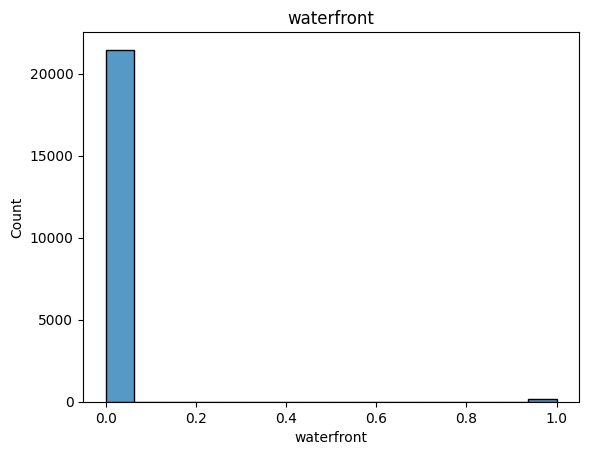

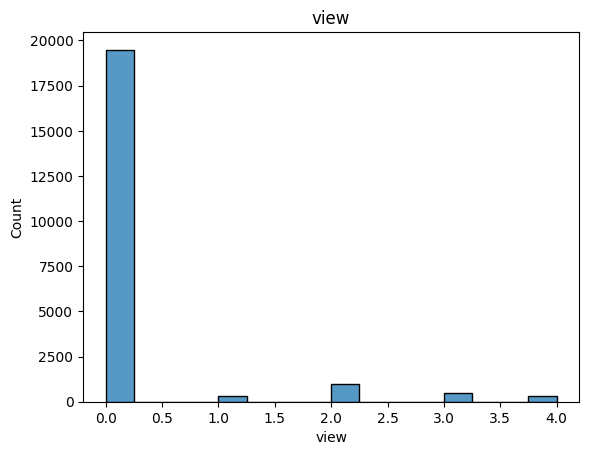

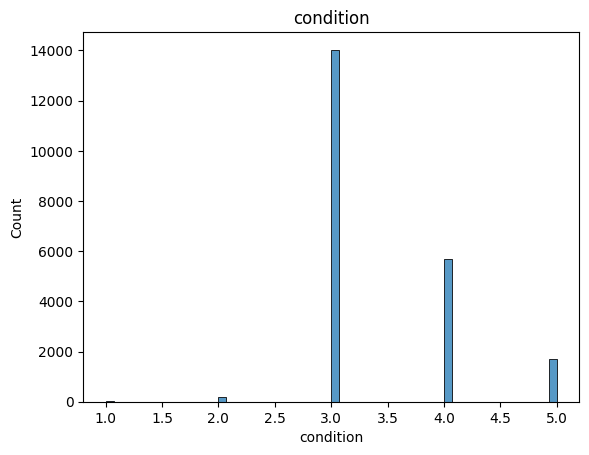

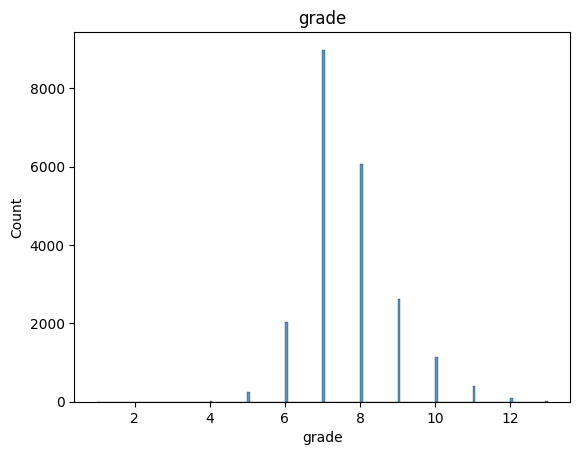

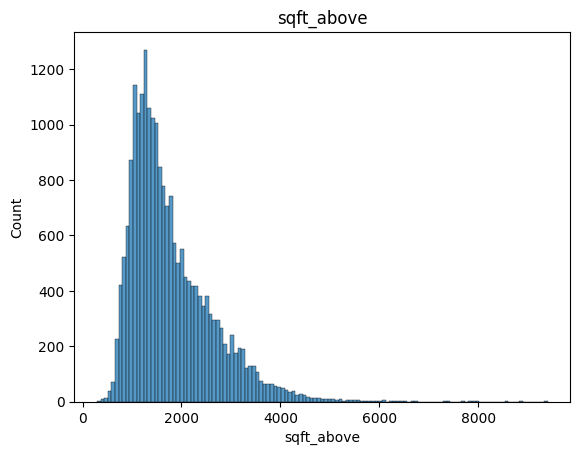

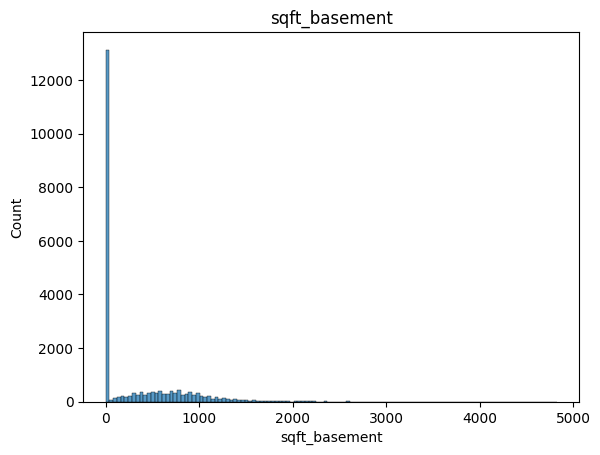

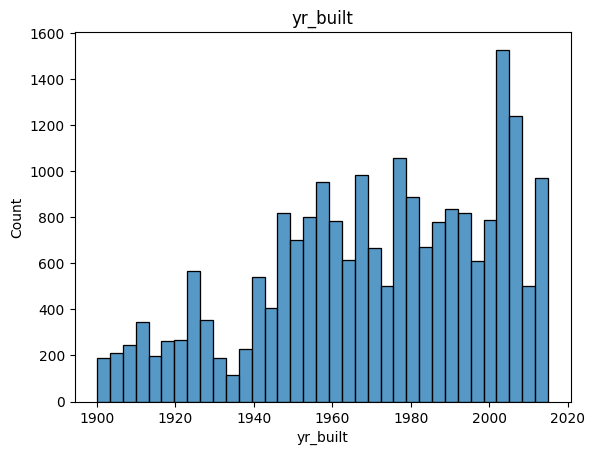

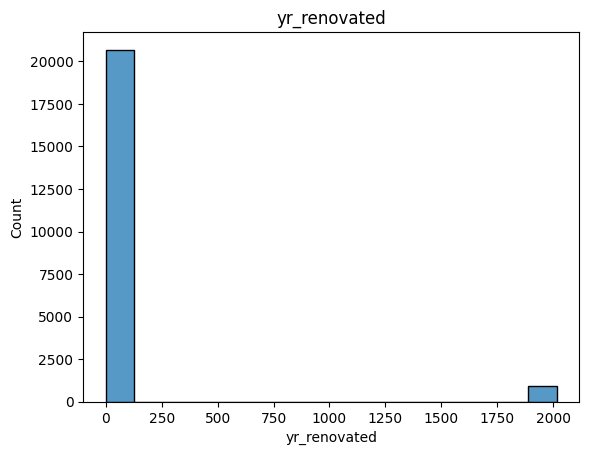

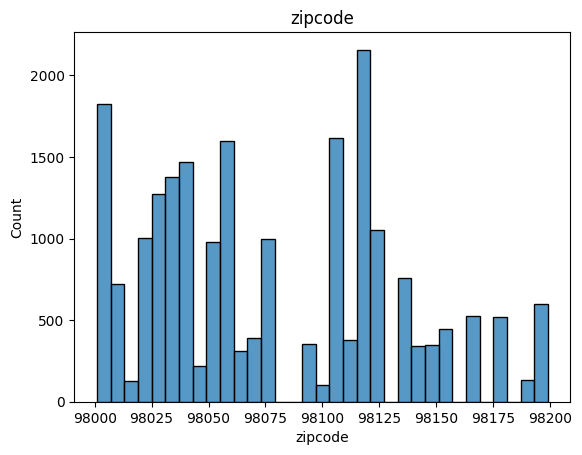

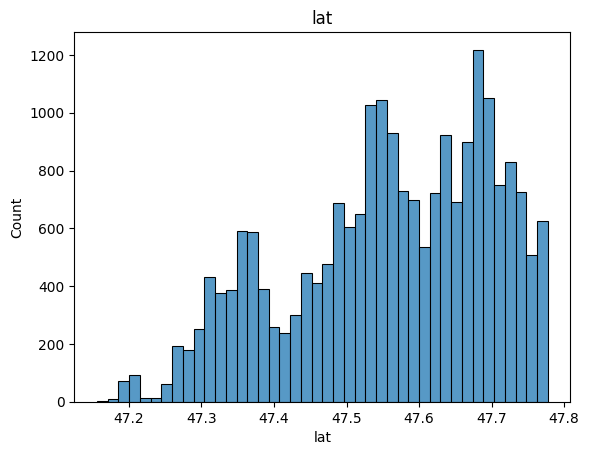

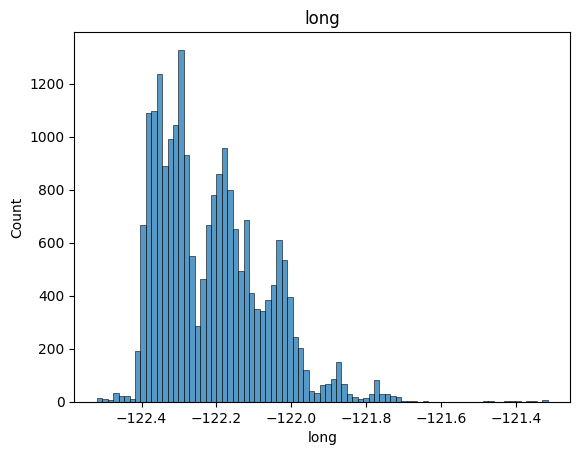

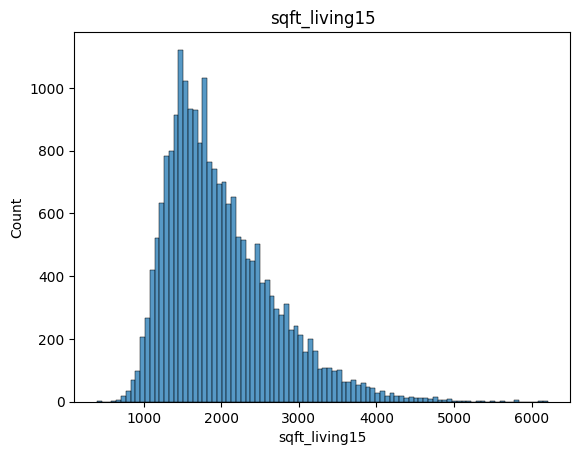

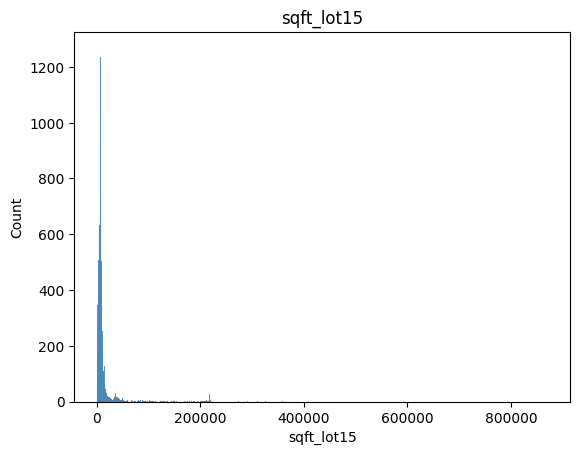

In [21]:
# zframe = df.drop(['date'], axis=1)
for col in df.columns:
    # plt.figure(figsize=(16, 10))
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

# sns.histplot(df['price'])
# plt.show()

# cleanedPrice = z_score.calculateList(df['price'], 3, True)
# sns.histplot(cleanedPrice)
# plt.show()

# Prøv at plotte data med stor forskel i min og max fra standard deviation, og hvis det er en klokke, så overvej at skære data fra med z-score

If a column follows a bellcurve, the z-score technic for cutting outliers can be used.

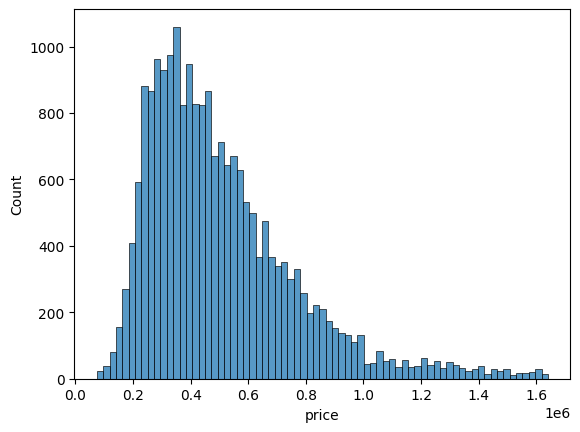

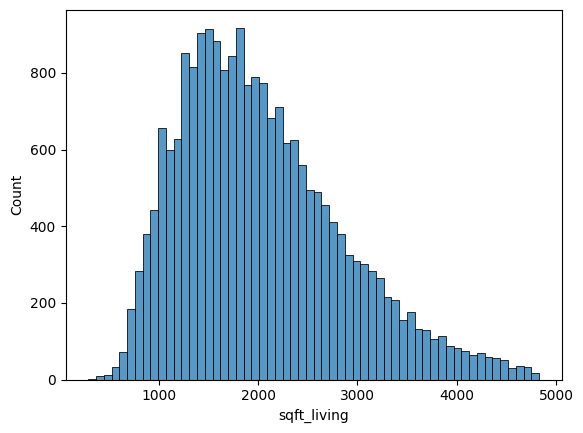

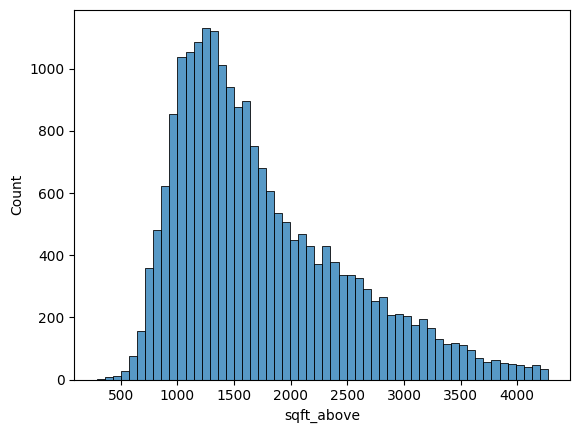

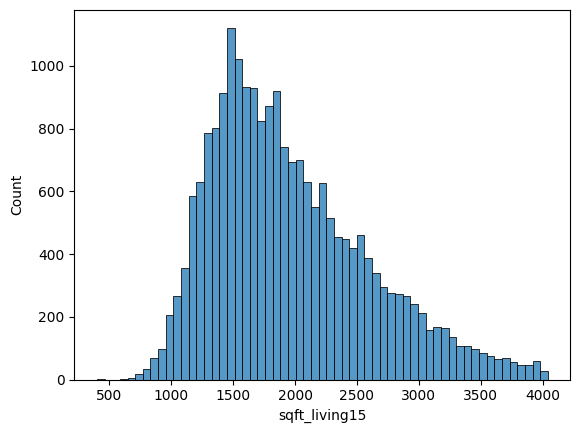

In [22]:
# Columns following the normal distribution: price, sqft_living, sqft_above, sqft_living15
# Also, an inconsistency seen in sqft_basement. Consider removing 0 values from the column. 

cleaned_df = df.copy()

# Clean price
cleaned_df['price'] = z_score.calculateList(df['price'], drop=True)

# Clean sqft_living
cleaned_df['sqft_living'] = z_score.calculateList(df['sqft_living'], drop=True)

# Clean sqft_above
cleaned_df['sqft_above'] = z_score.calculateList(df['sqft_above'], drop=True)

# Clean sqft_living15
cleaned_df['sqft_living15'] = z_score.calculateList(df['sqft_living15'], drop=True)

cleaned_df.describe()

sns.histplot(cleaned_df['price'])
plt.show()

sns.histplot(cleaned_df['sqft_living'])
plt.show()

sns.histplot(cleaned_df['sqft_above'])
plt.show()

sns.histplot(cleaned_df['sqft_living15'])
plt.show()

This provides a lot cleaner data for further working with

# Step 4: Data preperation

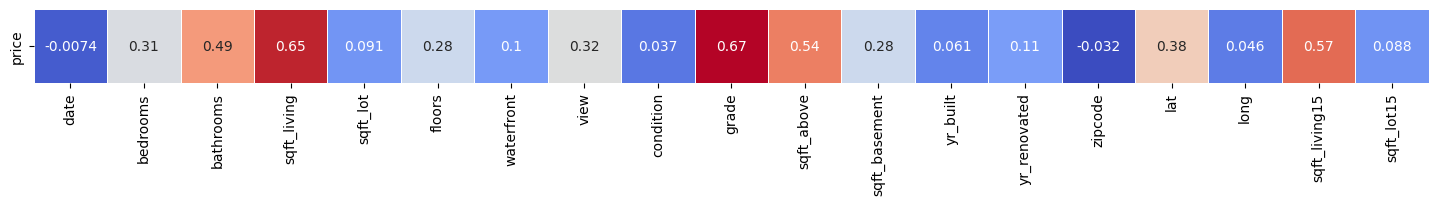

price            1.000000
grade            0.672070
sqft_living      0.650992
sqft_living15    0.569122
sqft_above       0.539246
bathrooms        0.494776
lat              0.384907
view             0.318104
bedrooms         0.311157
sqft_basement    0.278555
floors           0.278034
yr_renovated     0.107197
waterfront       0.100946
sqft_lot         0.091307
sqft_lot15       0.087579
yr_built         0.060582
long             0.045966
condition        0.036619
date            -0.007422
zipcode         -0.032356
Name: price, dtype: float64

Closest to zero: date


In [23]:
df_corr = cleaned_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr['price'].drop('price').to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, square=True)
plt.show()

# Using the absolute value of the correlation, we can find the attribute that is closest to zero
df_price_corr = df_corr['price'].sort_values(ascending=False)
print(df_price_corr)

closest_to_zero = df_price_corr.abs().idxmin()
print(f"\nClosest to zero: {closest_to_zero}")

Using the above diagram and correlation output, it can be seen a multiple low correlations between price and the rest of the data. Anything below 1% is unlikely to have any effect on the price. From the diagram, it can be seen that 'date' lies below the set threshold and will be dropped.

In [24]:
cleaned_df = cleaned_df.drop(['date'], axis=1)
cleaned_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800.0,7503


Before doing a PCA analysis, the data should be standardized

In [25]:
from sklearn.preprocessing import StandardScaler
transformed_values = StandardScaler().fit_transform(cleaned_df.values)

transformed_df = pd.DataFrame(transformed_values, index=cleaned_df.index, columns=cleaned_df.columns)

Before doing the PCA analysis, it is a good idea to attempt to determine the amount of components needed. For this assignment, an estimat will be found by using a few different methods. First by simply plotting the explained variance of a max PCA analysis using Sklearn, then by making a 'scree' plot based on a calculated exp variance and finally by using Kaiser's rule on the Eigen values.

Source: [Determening PCA components](https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Principal-Component-Analysis/PCA-the-basics/Choose-Principal-Components/index.html)

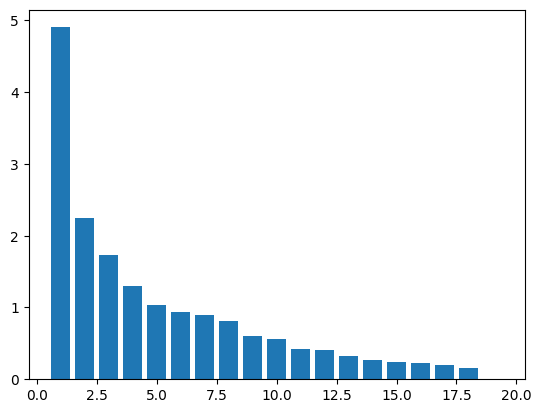

PCA explained variance: [4.90331030e+00 2.24462403e+00 1.72583967e+00 1.29501976e+00
 1.03743122e+00 9.41117695e-01 8.90858157e-01 8.18330813e-01
 6.04524465e-01 5.56489462e-01 4.27757785e-01 4.07467051e-01
 3.18521161e-01 2.69564792e-01 2.43735442e-01 2.31594240e-01
 2.00596628e-01 1.63581887e-01 1.10681249e-31]
Total variance: 17.28036456187416
Sum of eigenvalues: 17.280364561874176


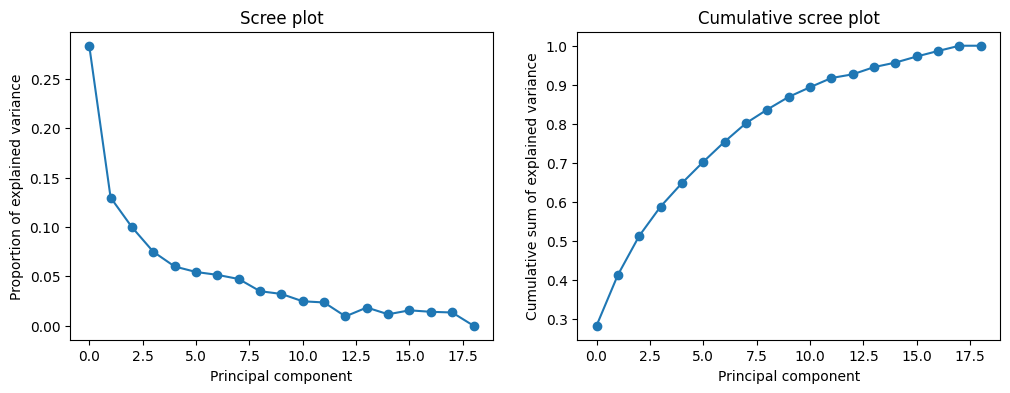

Eigen values: ['4.9033', '2.2446', '1.7258', '1.2950', '1.0374', '0.9411', '0.8909', '0.8183', '0.6045', '0.5565', '0.4278', '0.4075', '0.1636', '0.3185', '0.2006', '0.2696', '0.2437', '0.2316', '0.0000']
[0 1 2 3 4]


In [26]:
# First the PCA analysis with the full dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=transformed_df.columns.size)
transformed_df.isna().sum()
transformed_df = transformed_df.dropna()
transformed_df.isna().sum()
pca_result = pca.fit_transform(transformed_df)

plt.bar(range(1, 20), pca.explained_variance_)
plt.show()
print(f"PCA explained variance: {pca.explained_variance_}")

# Now it is manually calculated to check if the results are the same or similar
eig_vals, eig_vecs = np.linalg.eig(transformed_df.cov())

total_var = transformed_df.var().sum()
print(f"Total variance: {total_var}")

eig_vals_sum = eig_vals.sum()
print(f"Sum of eigenvalues: {eig_vals_sum}")
# Both the sum of the eigenvalues and the total variance should be equal to each other, or at least approximately equal

var_exp = eig_vals / total_var

# The scree plot is used to visually determine the number of principal components by looking for the "elbow" of the scree
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(var_exp, marker="o")
ax[0].set_xlabel("Principal component")
ax[0].set_ylabel("Proportion of explained variance")
ax[0].set_title("Scree plot")

ax[1].plot(np.cumsum(var_exp), marker="o")
ax[1].set_xlabel("Principal component")
ax[1].set_ylabel("Cumulative sum of explained variance")
ax[1].set_title("Cumulative scree plot")
plt.show()

# Finally, the Kaiser rule is applied to determine the number of principal components to keep based on the eigenvalues above 1
formatted_eig_vals = ["{:.4f}".format(i) for i in eig_vals]
print(f"Eigen values: {formatted_eig_vals}" )

kaiser_rule = np.where(eig_vals > 1)[0]
print(kaiser_rule)

From the graphs, 2 "elbows" can be seen in the period of 5 to 7.

The 5th value of the Eigens is the last above 1, but as Kaiser's rule should be taken as a bit of a guideline, the values at 6, 7 and 8 could also be alright.

Since 5 seems like the best of the values based on both graphs and Kaiser's rule, this is what will be used for a proper PCA.

PCA analysis

In [27]:
from sklearn.decomposition import PCA

pca = PCA(5)
transformed_df.isna().sum()
transformed_df = transformed_df.dropna()
transformed_df.isna().sum()
pca_result = pca.fit_transform(transformed_df)

# Transformed back to Pandas DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i}" for i in range(1, 6)])
print(f"Shape of the original DataFrame: {transformed_df.shape}")
print(f"Shape of the PCA DataFrame: {pca_df.shape}")

pca_df.head()

Shape of the original DataFrame: (20917, 19)
Shape of the PCA DataFrame: (20917, 5)


,PC1,PC2,PC3,PC4,PC5
0,-2.745342,0.187814,-0.581077,0.563867,0.254200
1,0.044552,-1.872815,-0.940100,1.994644,2.194926
2,-2.653160,0.698323,0.201663,0.528084,-1.140629
3,-1.034936,-2.164388,0.792326,-1.700716,-0.031702
4,-0.061763,0.930857,-0.252286,0.117106,-0.681889


# Step 5: Training a model

In [28]:
# For the sake of readability, all the imports are gathered in the top cell of the training section
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import gc

set_prop = 0.2
seed = 42

A few different models will be tried to find the best fitting model, including Random Forest Regressor, Polynominal Regression and Linear Regression.

Another option could be to make a Voting Classifier, with all the previously mentioned models to find the best value. While this could provide a better result, it is also a bit slower and requires more memory as it has to get the result from each model.

In [29]:
# Polynomial regression with PCA

X, y = pca_result[:, :-1], pca_result[:, -1]

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

score = r2_score(y, y_pred)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")

rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse}")

del X, y
del poly, X_poly
del model, y_pred
gc.collect() # The collector is the last print in the console

R2 accuracy score: 0.4315256312887271
Mean squared error: 0.58972410284824
Root mean squared error: 0.7679349600377886


155103

In [30]:
# Linear regression with PCA

X, y = pca_result[:, :-1], pca_result[:, -1]

y = y.astype(int)  # Convert y to integer values

class0 = np.array(X[y == 0])
class1 = np.array(X[y == 1])
class2 = np.array(X[y == 2])
class3 = np.array(X[y == 3])
class4 = np.array(X[y == 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_prop, random_state=seed)

params = {'max_depth': 5}

linearRegr = LinearRegression()

linearRegr.fit(X_train, y_train)

y_pred = linearRegr.predict(X_test)

score = linearRegr.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

del X, y, X_train, X_test, y_train, y_test
del linearRegr
gc.collect() # The collector is the last print in the console

R2 accuracy score: 0.010068468387332996
Mean squared error: 0.5228708566991429
Root mean squared error: 0.7230980961800016


0

In [31]:
# Linear regression with transformed data (without PCA)

df = cleaned_df.dropna()

# Split the data into features and target
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_prop, random_state=seed)

linearRegr = LinearRegression()

linearRegr.fit(X_train, y_train)

y_pred = linearRegr.predict(X_test)

score = linearRegr.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

del X, y, X_train, X_test, y_train, y_test
del linearRegr
gc.collect() # The collector is the last print in the console

R2 accuracy score: 0.6760175330261868
Mean squared error: 20651625483.93346
Root mean squared error: 143706.73430265355


0

In [32]:
# Random forest with transformed data (without PCA)

df = cleaned_df.dropna()

# Split the data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_prop, random_state=seed)

# Create and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

del X, y, X_train, X_test, y_train, y_test
del model
gc.collect() # The collector is the last print in the console

R2 accuracy score: 0.8536227026688235
Mean squared error: 9330533075.044975
Root mean squared error: 96594.68450719726


66

In [33]:
# Random forest with PCA

X, y = pca_result[:, :-1], pca_result[:, -1]

y = y.astype(int)  # Convert y to integer values

class0 = np.array(X[y == 0])
class1 = np.array(X[y == 1])
class2 = np.array(X[y == 2])
class3 = np.array(X[y == 3])
class4 = np.array(X[y == 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_prop, random_state=seed)

# Create and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

del X, y, X_train, X_test, y_train, y_test
del model
gc.collect() # The collector is the last print in the console

R2 accuracy score: 0.4275313237942684
Mean squared error: 0.3023716061185468
Root mean squared error: 0.5498832659015428


66

After having run all the models, the one providing the best result was: Random Forest with transformed data (without PCA).

It had both the highest R2 score (0.85), but it was also a bit slower running at ~12 seconds on mid/high-end hardware. This is because it is running on an only lightly cleaned data set, where as the version using the PCA result took about half the time, but it also provided about half the R2 score (0.43). By increasing the amount of components from the PCA analysis, the accuracy can be increased at the cost of speed.

To use the model again, it is saved to the harddrive using the "pickle" method. Due to its size, it'll be ignored when pushing to version control.

In [34]:
import pickle

# Random forest with transformed data (without PCA)

df = cleaned_df.dropna()

# Split the data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_prop, random_state=seed)

In [35]:
# Create and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

R2 accuracy score: 0.8535646617354756
Mean squared error: 9334232780.246412
Root mean squared error: 96613.83327581207


In [36]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions on the validation set
y_pred = loaded_model.predict(X_test)

score = loaded_model.score(X_test, y_test)
print(f"R2 accuracy score: {score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

R2 accuracy score: 0.8535646617354756
Mean squared error: 9334232780.246412
Root mean squared error: 96613.83327581207


The saved model can now be used to attempt to predict the price of a new house. From previously, there is a known error of around $95.000 which should be kept in mind when looking at the result. This error is not that large when it is considered that the highest price is above $1.640.000.

In [37]:
# Features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X_new = [[3, 2, 2000, 5000, 2, 0, 0, 3, 7, 1500, 500, 1990, 2010, 98001, 47.3, -122.2, 2000, 5000]]
y_new = model.predict(X_new)
print(y_new)

[271727.19]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:
del X, y, X_train, X_test, y_train, y_test
del model
gc.collect()

66